In [6]:
#  Import needed pc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import requests, zipfile, io
import os

In [7]:
#  Load Yelp processed dataframe
df = pd.read_csv('./post_processed_data/yelp_processed_dataset.csv')
df.head()

,business_id,name,state,latitude,longitude,stars,review_count,is_open,categories,general_category,...,attributes.RestaurantsTakeOut,attributes.WheelchairAccessible,attributes.WiFi,attributes.Smoking,attributes.ByAppointmentOnly,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,NC,35.462724,-80.852612,3.5,36,1,"['Guns and Ammo', 'Gun/Rifle Ranges', 'Active ...",Active Life,...,NaN,NaN,NaN,NaN,False,False,False,False,True,False
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",AZ,33.569404,-111.890264,5.0,4,1,"['Pilates', 'Yoga', 'Health and Medical', 'Fit...",Active Life,...,NaN,NaN,NaN,NaN,True,False,False,False,False,False
2,XNoUzKckATkOD1hP6vghZg,Felinus,QC,45.479984,-73.580070,5.0,5,1,"['Pet Groomers', 'Pets', 'Pet Services']",Pets,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,NV,36.219728,-115.127725,2.5,3,0,"['Home and Garden', 'Hardware Stores', 'Home S...",Shopping,...,NaN,NaN,NaN,NaN,False,False,False,False,True,False
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,AZ,33.428065,-111.726648,4.5,26,1,"['Electricians', 'Contractors', 'Home Services...",Home Services,...,NaN,NaN,NaN,NaN,True,False,False,False,False,False


In [8]:
#  Obtain the count of businesses per state
state_data = df.groupby('state')['business_id'].count()\
                                               .to_frame().reset_index()
state_data

,state,business_id
0,AB,8661
1,AK,1
2,AL,3
3,AR,1
4,AZ,60642
5,BC,2
6,CA,23
7,CO,2
8,CT,2
9,DOW,1


In [9]:
# Create a directory to store the shapefiles
current_wd = os.getcwd()  # Path of current working directory
try:
    os.mkdir('{}/post_processed_data/shapefiles/'.format(current_wd))
except:
    pass

In [10]:
# Obtain shapefile from the internet
# Shapefile of North America obtained from:
# http://www5.cec.org/tools-and-resources/map-files/political-boundaries-2010

r = requests.get('http://www5.cec.org/sites/default/files/Atlas/Files/'
                 'Political_Boundaries/PoliticalBoundaries_Shapefiles.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./post_processed_data/shapefiles/")

In [11]:
# Read the shapefile
shp_file = geopandas.read_file('./post_processed_data/shapefiles/'
                               'PoliticalBoundaries_Shapefiles/'
                               'NA_PoliticalDivisions/data/bound_p/'
                               'boundary_p_v2.shp')

In [12]:
# Remove rows outside of USA and Canada
north_am = shp_file[(shp_file['COUNTRY'] == 'CAN') |
                    (shp_file['COUNTRY'] == 'USA')]
north_am = north_am[north_am['NAME'] != "water/agua/d'eau"]
north_am

,UIDENT,NAME,COUNTRY,STATEABB,EDIT_DATE,EDIT,Shape_Leng,Shape_Area,geometry
93,171204,Navassa Island,USA,None,20060803,NEW,8896.814526,5.109928e+06,"POLYGON ((2669396.843 -2561562.200, 2669579.57..."
139,172304,Puerto Rico,USA,None,20060803,NEW,30221.541097,5.988909e+07,"POLYGON ((3407616.761 -2352203.745, 3407903.51..."
150,172904,United States Virgin Islands,USA,None,20060803,NEW,85417.448506,2.279750e+08,"POLYGON ((3744618.504 -2259758.237, 3738550.72..."
155,172104,Puerto Rico,USA,None,20060803,NEW,68896.360901,1.486426e+08,"POLYGON ((3662212.260 -2248966.243, 3662212.25..."
157,170704,Puerto Rico,USA,None,20060803,NEW,464537.078618,8.800069e+09,"POLYGON ((3622076.751 -2239021.991, 3623507.50..."
...,...,...,...,...,...,...,...,...,...
1822,130504,Ontario,CAN,CA-ON,20060803,NEW,39855.486704,7.197965e+07,"POLYGON ((1823579.118 164205.888, 1820098.238 ..."
1824,133304,Ontario,CAN,CA-ON,20060803,NEW,26831.401895,4.101412e+07,"POLYGON ((1423533.496 -213370.224, 1422006.622..."
1825,9704,Nunavut,CAN,CA-NU,20090827,EDT,930097.952746,1.578308e+10,"POLYGON ((-228721.783 3510469.513, -226584.932..."
1826,6304,Nunavut,CAN,CA-NU,20090827,EDT,56430.585667,1.808613e+08,"POLYGON ((-241724.511 3626748.639, -241724.560..."


In [13]:
# Obtain State abbreviation from STATEABB
north_am["STATE"] = north_am['STATEABB'].apply(lambda x: x.split('-')[1]
                                               if x is not None else x)
north_am

,UIDENT,NAME,COUNTRY,STATEABB,EDIT_DATE,EDIT,Shape_Leng,Shape_Area,geometry,STATE
93,171204,Navassa Island,USA,None,20060803,NEW,8896.814526,5.109928e+06,"POLYGON ((2669396.843 -2561562.200, 2669579.57...",None
139,172304,Puerto Rico,USA,None,20060803,NEW,30221.541097,5.988909e+07,"POLYGON ((3407616.761 -2352203.745, 3407903.51...",None
150,172904,United States Virgin Islands,USA,None,20060803,NEW,85417.448506,2.279750e+08,"POLYGON ((3744618.504 -2259758.237, 3738550.72...",None
155,172104,Puerto Rico,USA,None,20060803,NEW,68896.360901,1.486426e+08,"POLYGON ((3662212.260 -2248966.243, 3662212.25...",None
157,170704,Puerto Rico,USA,None,20060803,NEW,464537.078618,8.800069e+09,"POLYGON ((3622076.751 -2239021.991, 3623507.50...",None
...,...,...,...,...,...,...,...,...,...,...
1822,130504,Ontario,CAN,CA-ON,20060803,NEW,39855.486704,7.197965e+07,"POLYGON ((1823579.118 164205.888, 1820098.238 ...",ON
1824,133304,Ontario,CAN,CA-ON,20060803,NEW,26831.401895,4.101412e+07,"POLYGON ((1423533.496 -213370.224, 1422006.622...",ON
1825,9704,Nunavut,CAN,CA-NU,20090827,EDT,930097.952746,1.578308e+10,"POLYGON ((-228721.783 3510469.513, -226584.932...",NU
1826,6304,Nunavut,CAN,CA-NU,20090827,EDT,56430.585667,1.808613e+08,"POLYGON ((-241724.511 3626748.639, -241724.560...",NU


In [14]:
# Remove Hawaii from the map to better zoom in
north_am = north_am[north_am['STATE'] != "HI"]

In [15]:
# Merge business count to the shapefile
df_geo = pd.merge(north_am, state_data, left_on='STATE', right_on='state')
df_geo

,UIDENT,NAME,COUNTRY,STATEABB,EDIT_DATE,EDIT,Shape_Leng,Shape_Area,geometry,STATE,state,business_id
0,156704,Florida,USA,US-FL,20060803,NEW,3311.555433,8.146979e+05,"POLYGON ((1745686.763 -2085164.615, 1745686.75...",FL,FL,3
1,156604,Florida,USA,US-FL,20060803,NEW,5009.358602,1.337103e+06,"POLYGON ((1740536.125 -2085593.990, 1740231.24...",FL,FL,3
2,156904,Florida,USA,US-FL,20060803,NEW,19674.409116,8.011668e+06,"POLYGON ((1824127.506 -2073250.121, 1824423.87...",FL,FL,3
3,157204,Florida,USA,US-FL,20060803,NEW,21679.096125,1.625219e+07,"POLYGON ((1860962.125 -2066363.876, 1860962.13...",FL,FL,3
4,156804,Florida,USA,US-FL,20060803,NEW,23011.391862,2.535288e+07,"POLYGON ((1868873.500 -2061855.375, 1868873.50...",FL,FL,3
...,...,...,...,...,...,...,...,...,...,...,...,...
548,127704,Ontario,CAN,CA-ON,20060803,NEW,12630.000641,7.076865e+06,"POLYGON ((1414205.495 193233.061, 1413812.361 ...",ON,ON,36540
549,130304,Ontario,CAN,CA-ON,20060803,NEW,85415.722063,1.312488e+08,"POLYGON ((1844557.994 171002.938, 1844339.120 ...",ON,ON,36540
550,128704,Ontario,CAN,CA-ON,20060803,NEW,31524.876042,3.978990e+07,"POLYGON ((1546034.485 166234.834, 1543467.866 ...",ON,ON,36540
551,130504,Ontario,CAN,CA-ON,20060803,NEW,39855.486704,7.197965e+07,"POLYGON ((1823579.118 164205.888, 1820098.238 ...",ON,ON,36540


In [16]:
# Save the final shapefile
df_geo.to_file('./post_processed_data/map.shp')

<ipython-input-16-8afd816ba85c>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_geo.to_file('./post_processed_data/map.shp')


In [17]:
# Remove duplicates in state
df_geo2 = df_geo.drop_duplicates(subset='state', keep='first')
df_geo2['coords'] = (df_geo2['geometry'].apply(
    lambda x: x.representative_point().coords[:]))
df_geo2['coords'] = [coords[0] for coords in df_geo2['coords']]

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


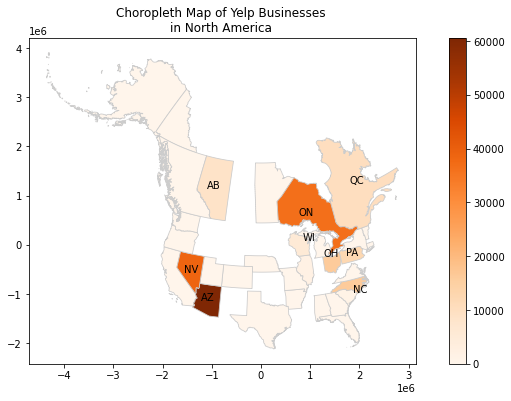

In [18]:
# Test plot for the shapefile
variable = 'business_id'
vmin, vmax = df_geo2["business_id"].min(), df_geo2["business_id"].max()

fig, ax = plt.subplots(1, figsize=(12, 6))

df_geo.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax,
            edgecolor='0.8', vmin=0, vmax=vmax)
rows = []
for idx, row in df_geo2.iterrows():
    if row[1] not in rows:
        if row['business_id'] > 3000:
            rows.append(row[1])
            plt.annotate(row['state'], xy=row['coords'],
                         horizontalalignment='center')

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0,
                                                              vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.title('Choropleth Map of Yelp Businesses \nin North America ')
plt.show()